In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.10.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

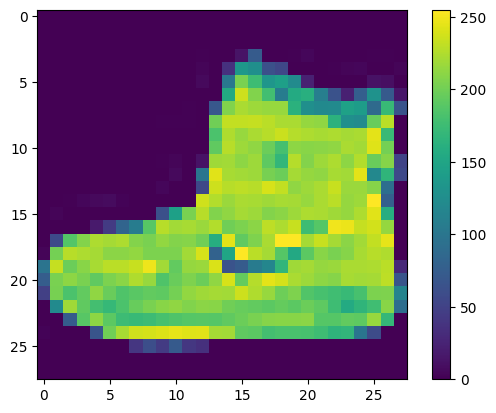

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images = train_images / 255.0

test_images = test_images / 255.0

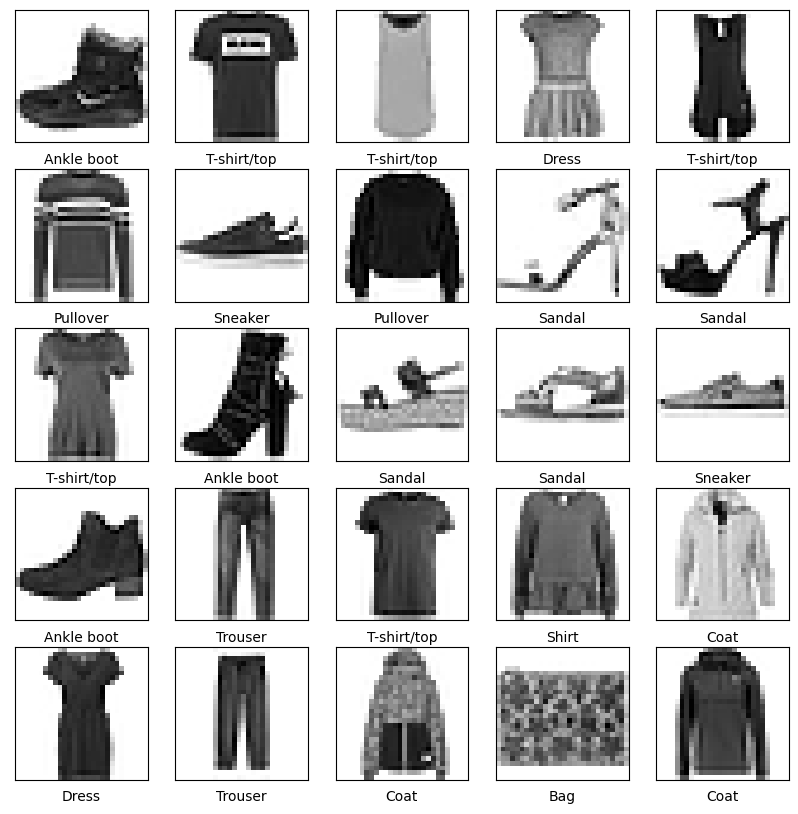

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0780 - accuracy: 0.6619
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6317 - accuracy: 0.7728
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5545 - accuracy: 0.8034
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5135 - accuracy: 0.8185
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4877 - accuracy: 0.8286
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4689 - accuracy: 0.8358
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4548 - accuracy: 0.8408
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4433 - accuracy: 0.8445
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4335 - accuracy: 0.8472
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.424

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4533 - accuracy: 0.8387 - 524ms/epoch - 2ms/step

Test accuracy: 0.838699996471405


In [14]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])


In [15]:
predictions = probability_model.predict(test_images)


313/313 [==============================] - 0s 1ms/step


In [17]:
predictions[0]


array([3.6468231e-07, 3.4913292e-08, 2.6181062e-06, 1.9697268e-06,
       3.0106901e-06, 1.6051155e-01, 4.1645981e-06, 2.6442218e-01,
       4.1309581e-03, 5.7092315e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])


9

In [19]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

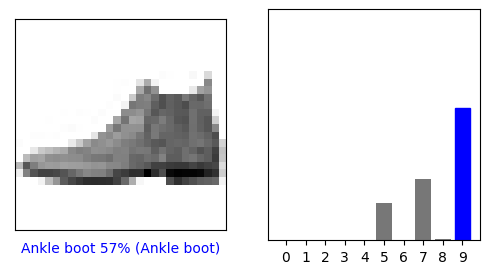

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


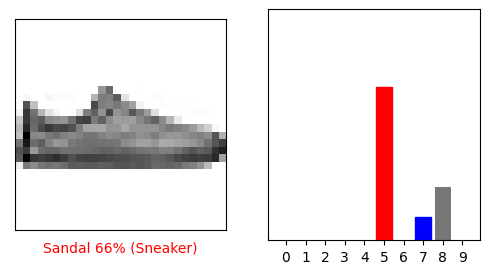

In [21]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


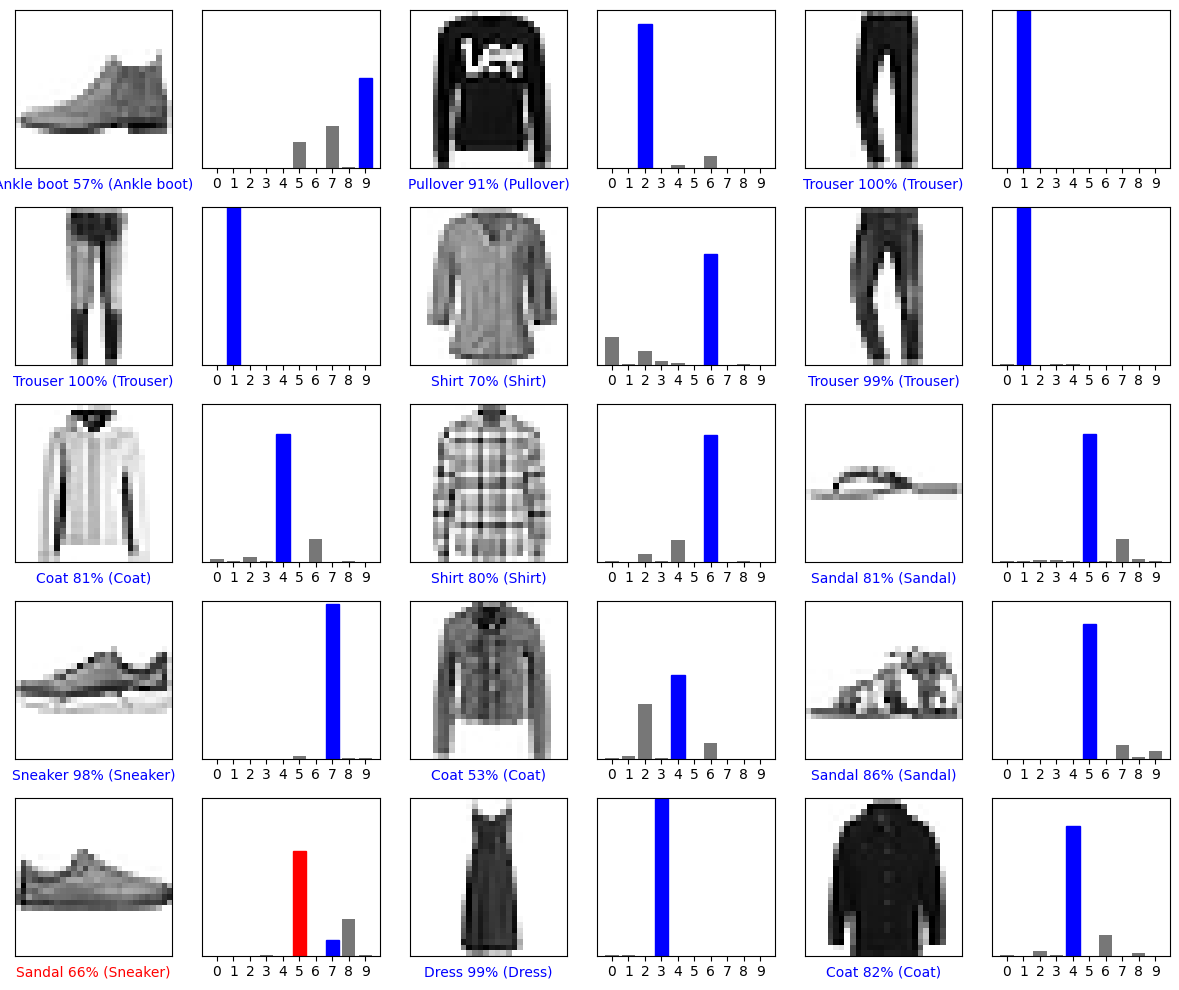

In [22]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [26]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)


(28, 28)


In [27]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [28]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 16ms/step
[[4.2495318e-04 1.0700156e-05 9.0960091e-01 1.4941464e-04 1.5397150e-02
  2.8096057e-09 7.4193418e-02 9.8450826e-15 2.2338597e-04 2.1321439e-11]]


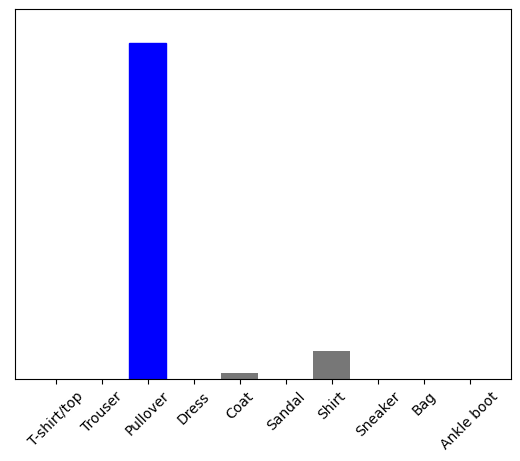

In [29]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()


In [30]:
np.argmax(predictions_single[0])


2